In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

savefig = False
fig_scale = 1.5
if savefig:
    fig_scale = 1
text_width = 3.25  # inches (single column width)
fig_width = text_width*fig_scale
fig_height = 0.8 * fig_width  # for standard plots
figsize = (fig_width,fig_height)
width_2_subplot = fig_width/2 + 0.25  # for side-by-side subplots
height_2_subplot = 0.75 * width_2_subplot
height_cbar_2_subplot = 0.75 * width_2_subplot
# plt.rcParams.update({
#     'font.size': 10,
#     'axes.labelsize': 10,
#     'axes.titlesize': 10,
#     'xtick.labelsize': 7,
#     'ytick.labelsize': 7,
#     'legend.fontsize': 7,
#     'axes.spines.top': False,
#     'axes.spines.right': False,
#     'figure.constrained_layout.use': True,
#     'figure.autolayout': False,
#     'axes.xmargin': 0.02,
#     'axes.ymargin': 0.02,
#     'figure.subplot.left': 0.2,
#     'figure.subplot.right': 0.97,
#     'figure.subplot.bottom': 0.12,
#     'figure.subplot.top': 0.92,
#     'figure.dpi': 100,
#     'savefig.dpi': 300,
# })

plt.style.use('seaborn-v0_8')
# plt.style.use('default')

# Pulsars Dataset

**Q** "assess whether the database can be used to predict labels for a larger dataset." 

### Plenimanary look at the data

In [2]:
filename = "pulsars.csv"
raw_df = pd.read_csv(filename)

# Top 5 rows
display(raw_df.head(5))

# Info about the columns
display(raw_df.info())

# Statistical description
display(raw_df.describe())

# Information in the labelling column
print(raw_df['Class label (0 = negative, 1 = positive)'].value_counts())

Mean of the integrated profile  \
0                      109.640625   
1                      100.851562   
2                      112.718750   
3                      120.554688   
4                      107.906250   

   Standard deviation of the integrated profile  \
0                                     49.017652   
1                                     51.743522   
2                                     50.301270   
3                                     45.549905   
4                                     48.084145   

   Excess kurtosis of the integrated profile  \
0                                   0.137636   
1                                   0.393837   
2                                   0.279391   
3                                   0.282924   
4                                   0.460847   

   Skewness of the integrated profile  Mean of the DM-SNR curve  \
0                           -0.256700                  1.508361   
1                           -0.011241                  2.841137   
2                           -0.129011                  8.281773   
3                            0.419909                  1.358696   
4                            0.296510                  1.993311   

   Standard deviation of the DM-SNR curve  \
0                               12.072901   
1                               21.635778   
2                               37.810012   
3                               13.079034   
4                               13.841070   

   Excess kurtosis of the DM-SNR curve  Skewness of the DM-SNR curve  \
0                            13.367926                    223.438419   
1                             8.302242                     71.584369   
2                             4.691827                     21.276210   
3                            13.312141                    212.597029   
4                             9.969395                    128.744717   

   Class label (0 = negative, 1 = positive)  
0                                         0  
1                                         0  
2                                         0  
3                                         1  
4                                         0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                1748 non-null   float64
 1   Standard deviation of the integrated profile  1748 non-null   float64
 2   Excess kurtosis of the integrated profile     1748 non-null   float64
 3   Skewness of the integrated profile            1748 non-null   float64
 4   Mean of the DM-SNR curve                      1748 non-null   float64
 5   Standard deviation of the DM-SNR curve        1748 non-null   float64
 6   Excess kurtosis of the DM-SNR curve           1748 non-null   float64
 7   Skewness of the DM-SNR curve                  1748 non-null   float64
 8   Class label (0 = negative, 1 = positive)      1748 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 123.0 KB


None

Mean of the integrated profile  \
count                     1748.000000   
mean                       110.505573   
std                         26.310155   
min                          6.500000   
25%                        100.660156   
50%                        115.421875   
75%                        126.746094   
max                        184.460938   

       Standard deviation of the integrated profile  \
count                                   1748.000000   
mean                                      46.549606   
std                                        6.999016   
min                                       25.695250   
25%                                       42.719917   
50%                                       46.905897   
75%                                       50.826484   
max                                       90.250557   

       Excess kurtosis of the integrated profile  \
count                                1748.000000   
mean                                    0.507882   
std                                     1.137468   
min                                    -1.581258   
25%                                     0.032573   
50%                                     0.228778   
75%                                     0.484039   
max                                     8.069522   

       Skewness of the integrated profile  Mean of the DM-SNR curve  \
count                         1748.000000               1748.000000   
mean                             1.950541                 12.449351   
std                              6.882728                 28.452940   
min                             -1.668540                  0.213211   
25%                             -0.179097                  1.908027   
50%                              0.190978                  2.831522   
75%                              0.853804                  5.561246   
max                             68.101622                201.534281   

       Standard deviation of the DM-SNR curve  \
count                             1748.000000   
mean                                26.488414   
std                                 19.727958   
min                                  7.370432   
25%                                 14.392421   
50%                                 18.483539   
75%                                 28.753780   
max                                110.642211   

       Excess kurtosis of the DM-SNR curve  Skewness of the DM-SNR curve  \
count                          1748.000000                   1748.000000   
mean                              8.331407                    107.198931   
std                               4.660181                    117.395027   
min                              -2.191995                     -1.976976   
25%                               5.737298                     34.126920   
50%                               8.436697                     81.283884   
75%                              10.727922                    140.085354   
max                              34.539844                   1191.000837   

       Class label (0 = negative, 1 = positive)  
count                               1748.000000  
mean                                   0.085812  
std                                    0.280167  
min                                    0.000000  
25%                                    0.000000  
50%                                    0.000000  
75%                                    0.000000  
max                                    1.000000

Class label (0 = negative, 1 = positive)
0    1598
1     150
Name: count, dtype: int64


The first 8 columns are continuous descriptive data on the pulsar, followed by the classification column, with 2 descrete values (0 = negative, 1 = positive). There is no missing data.

The assigned class labels means a supervised machine learning algorithm can be used in order to classify columns. The data set is also large enough (1748), so a test, train, split can be implemented allowing for testing of the model. 

### Correlation analysis

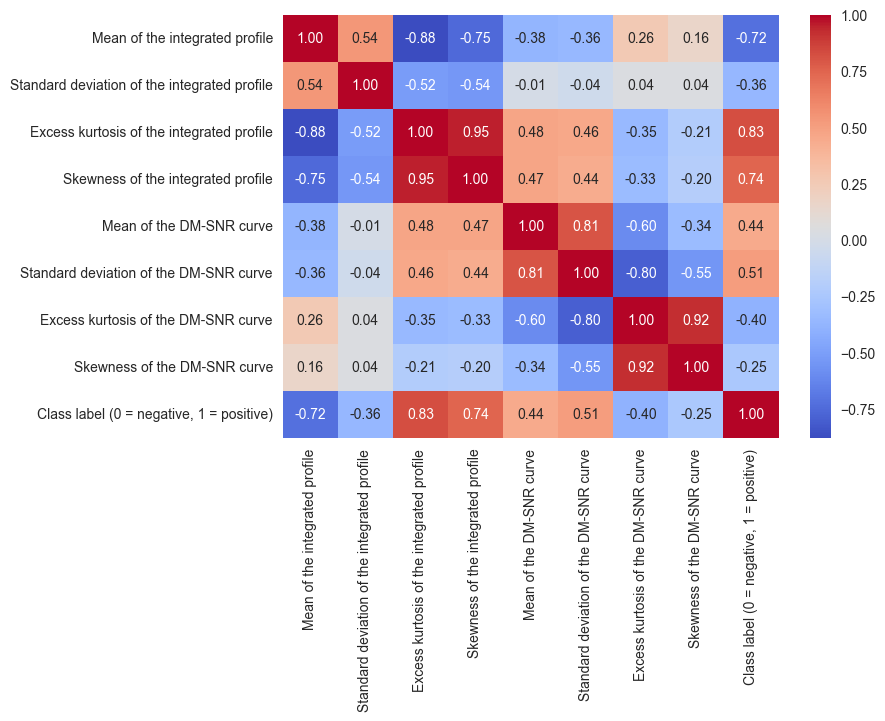

'Excess kurtosis of the integrated profile' and 'Skewness of the integrated profile' have a correlation of 0.95
'Skewness of the integrated profile' and 'Excess kurtosis of the integrated profile' have a correlation of 0.95
'Excess kurtosis of the DM-SNR curve' and 'Skewness of the DM-SNR curve' have a correlation of 0.92
'Skewness of the DM-SNR curve' and 'Excess kurtosis of the DM-SNR curve' have a correlation of 0.92


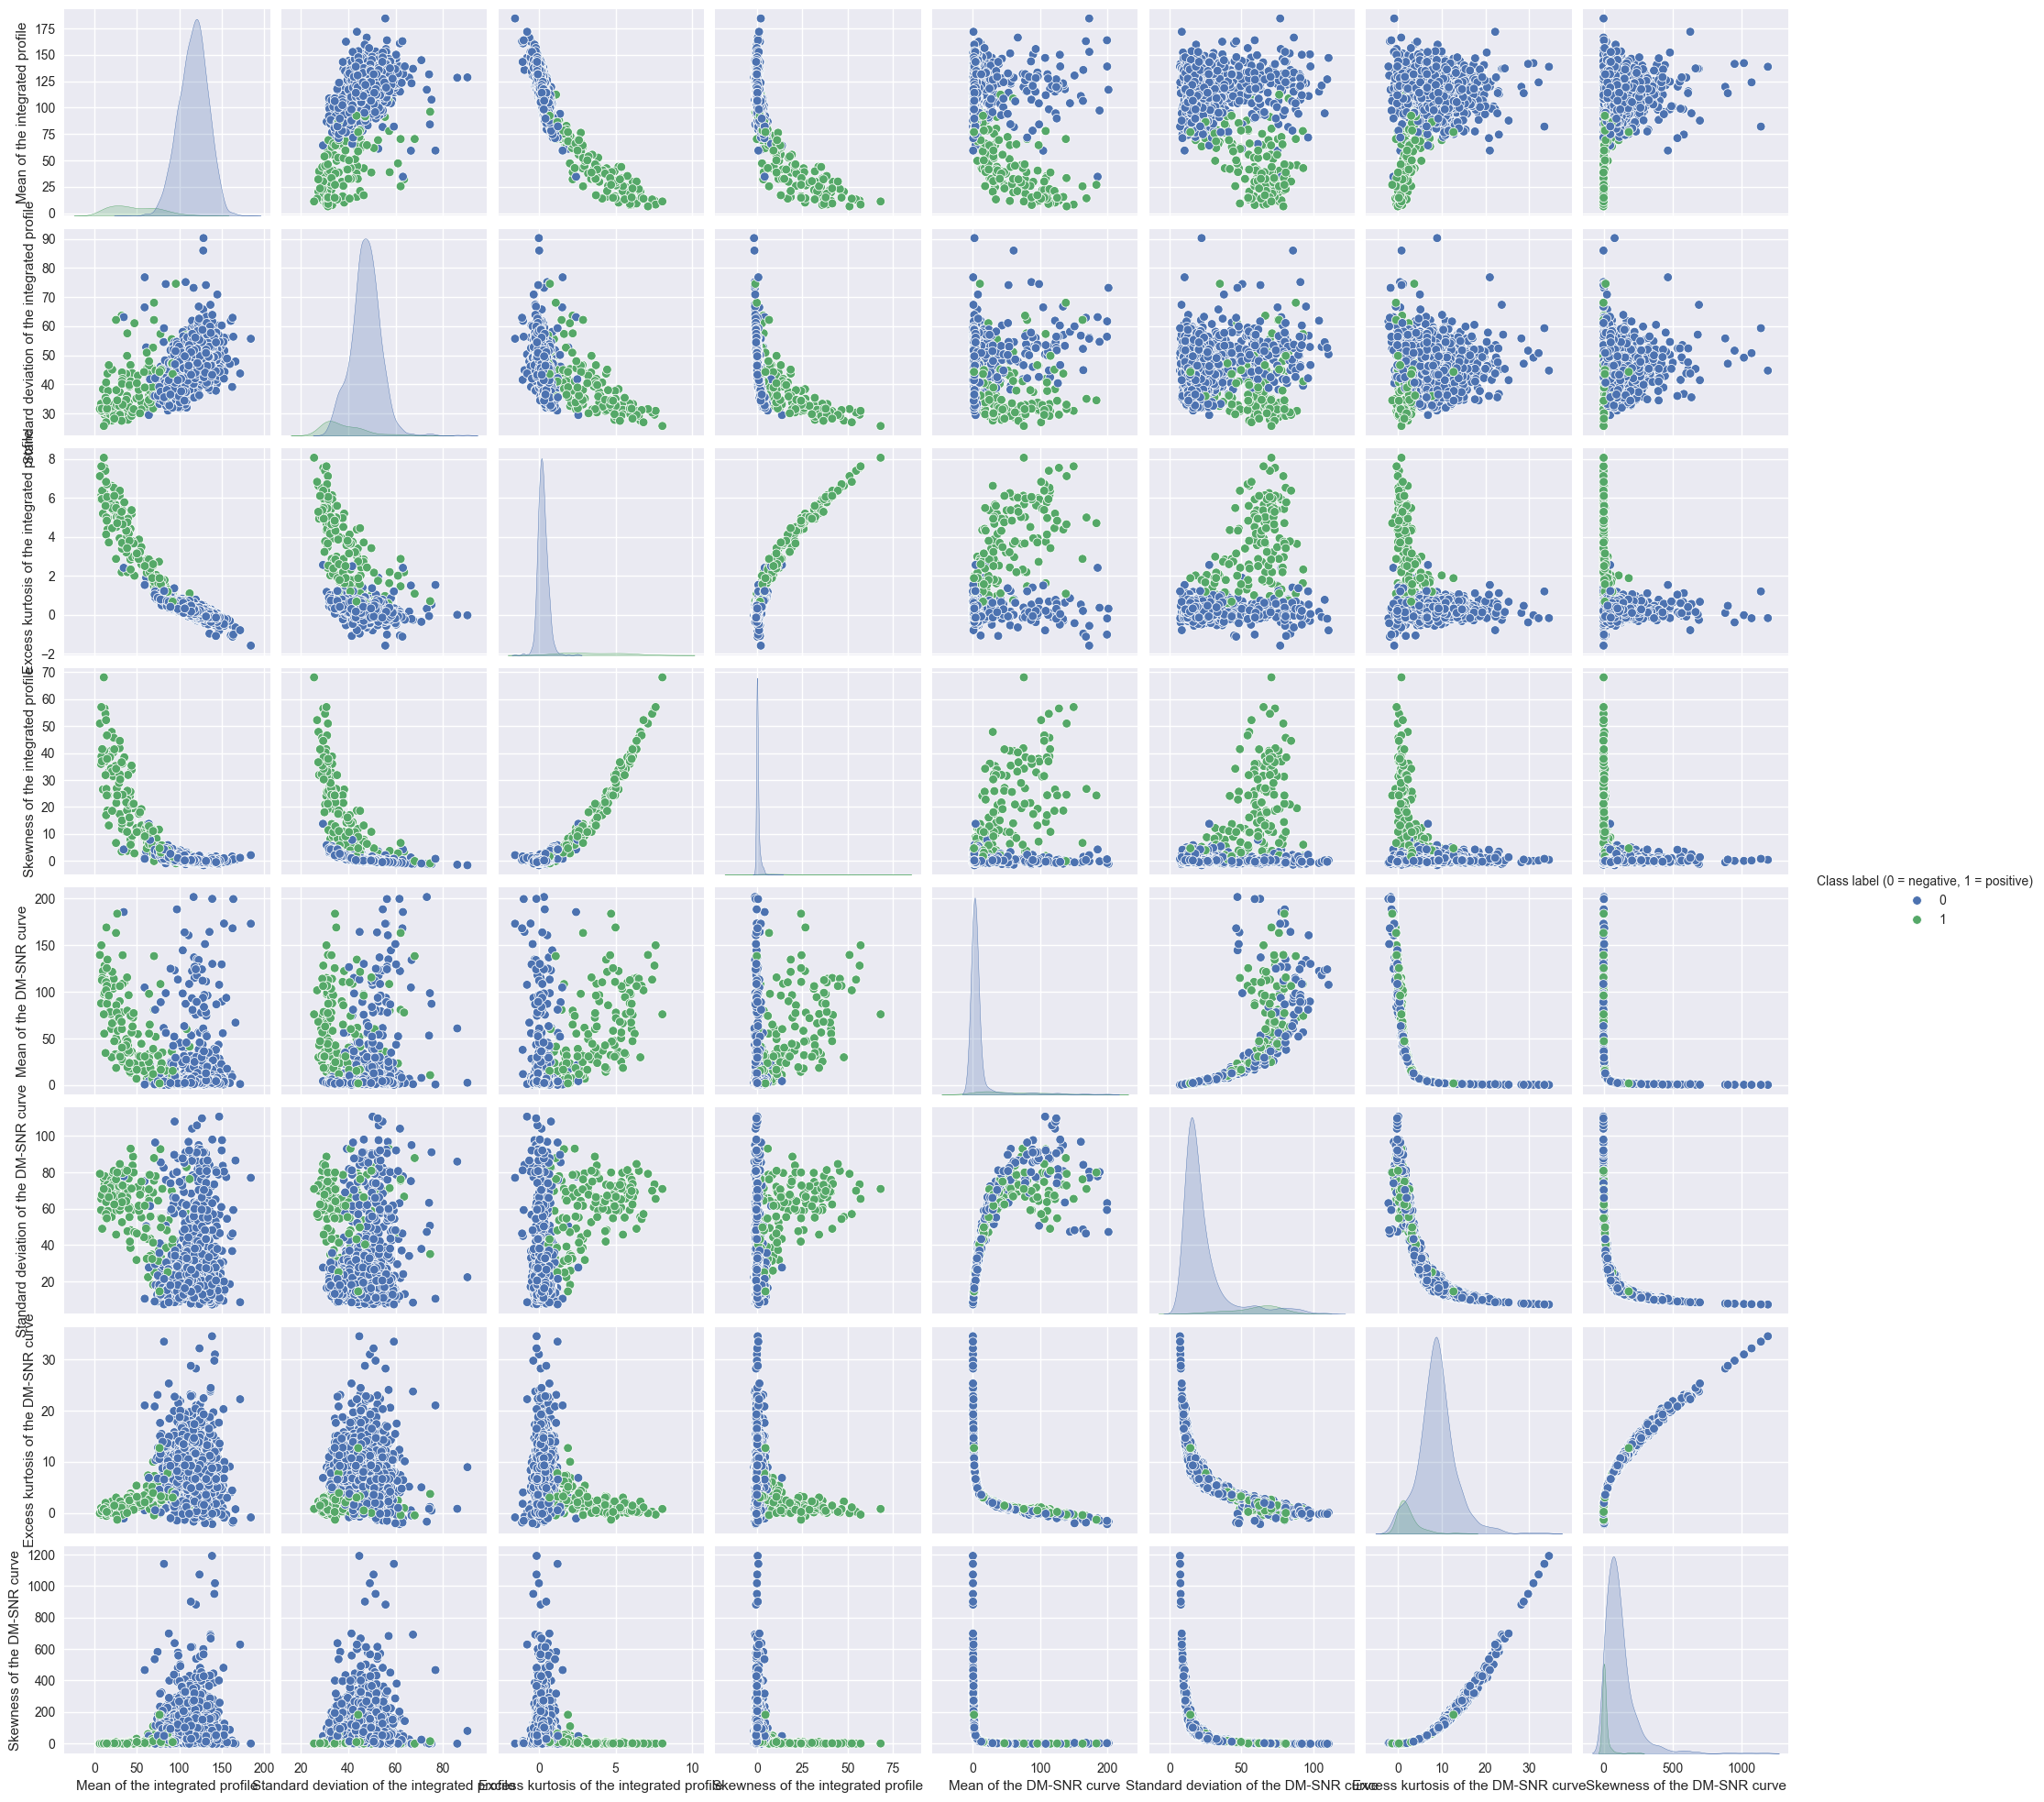

In [3]:
corr_df = raw_df.corr()
target_col = 'Class label (0 = negative, 1 = positive)'

# fig,ax = plt.subplots(1,1, figsize = figsize)
sns.heatmap(corr_df, annot = True, fmt = ".2f", cmap = "coolwarm")

plt.show()

corr_filter = corr_df.abs() > 0.9
highly_correlated_cols = []
for col1 in corr_df.columns:
    for col2 in corr_df.columns:
        if col1 != col2 and corr_filter.loc[col1, col2]:
            print(f"'{col1}' and '{col2}' have a correlation of {corr_df.loc[col1, col2]:.2f}")
            highly_correlated_cols.append(col1)

sns.pairplot(raw_df, hue = target_col)

Dropped col: 'Class label (0 = negative, 1 = positive)'


<Axes: >

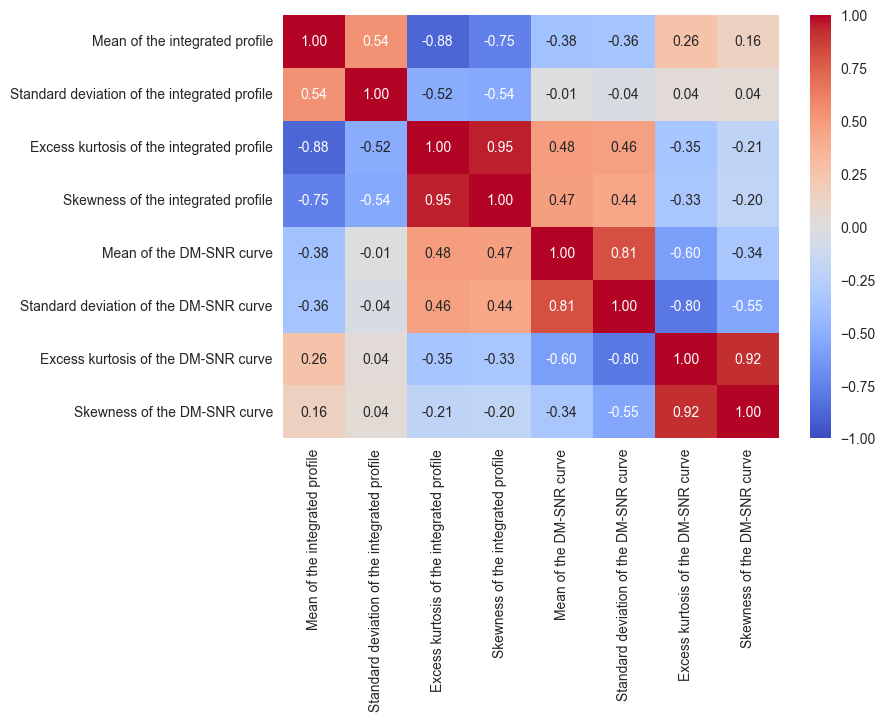

In [4]:
df_dropped1 = raw_df.drop('Class label (0 = negative, 1 = positive)',axis=1)
target_col = 'Class label (0 = negative, 1 = positive)'
print(f"Dropped col: 'Class label (0 = negative, 1 = positive)'")

corr_dropped = df_dropped1.corr()

sns.heatmap(corr_dropped, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)

`Excess kurtosis of the integrated profile` and `Skewness of the integrated profile` are highly correlated and so are `Excess kurtosis of the DM-SNR curve` and `Skewness of the DM-SNR curve`, with correlations over 0.9. one column for each pairing can be dropped to reduce the dimensionallity, this correlation occurs because  correlation as Excess kurtosis and Skewness both descriptors of the shape of the pulsar

#### Normalising and combining columns

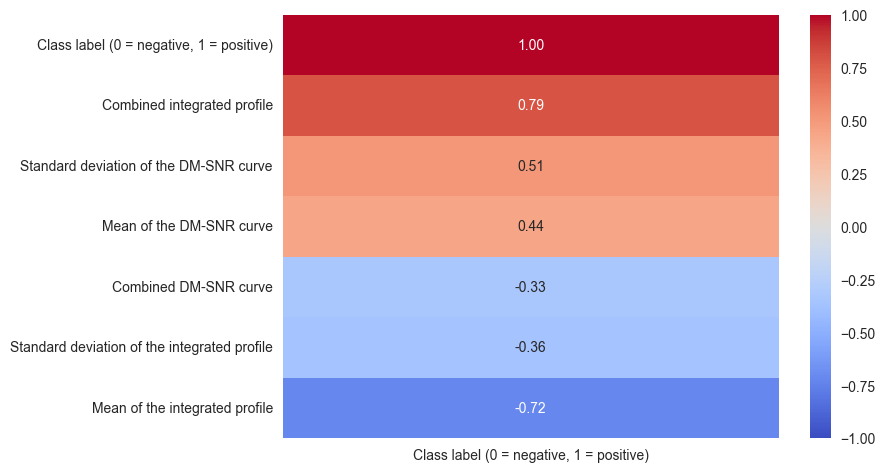

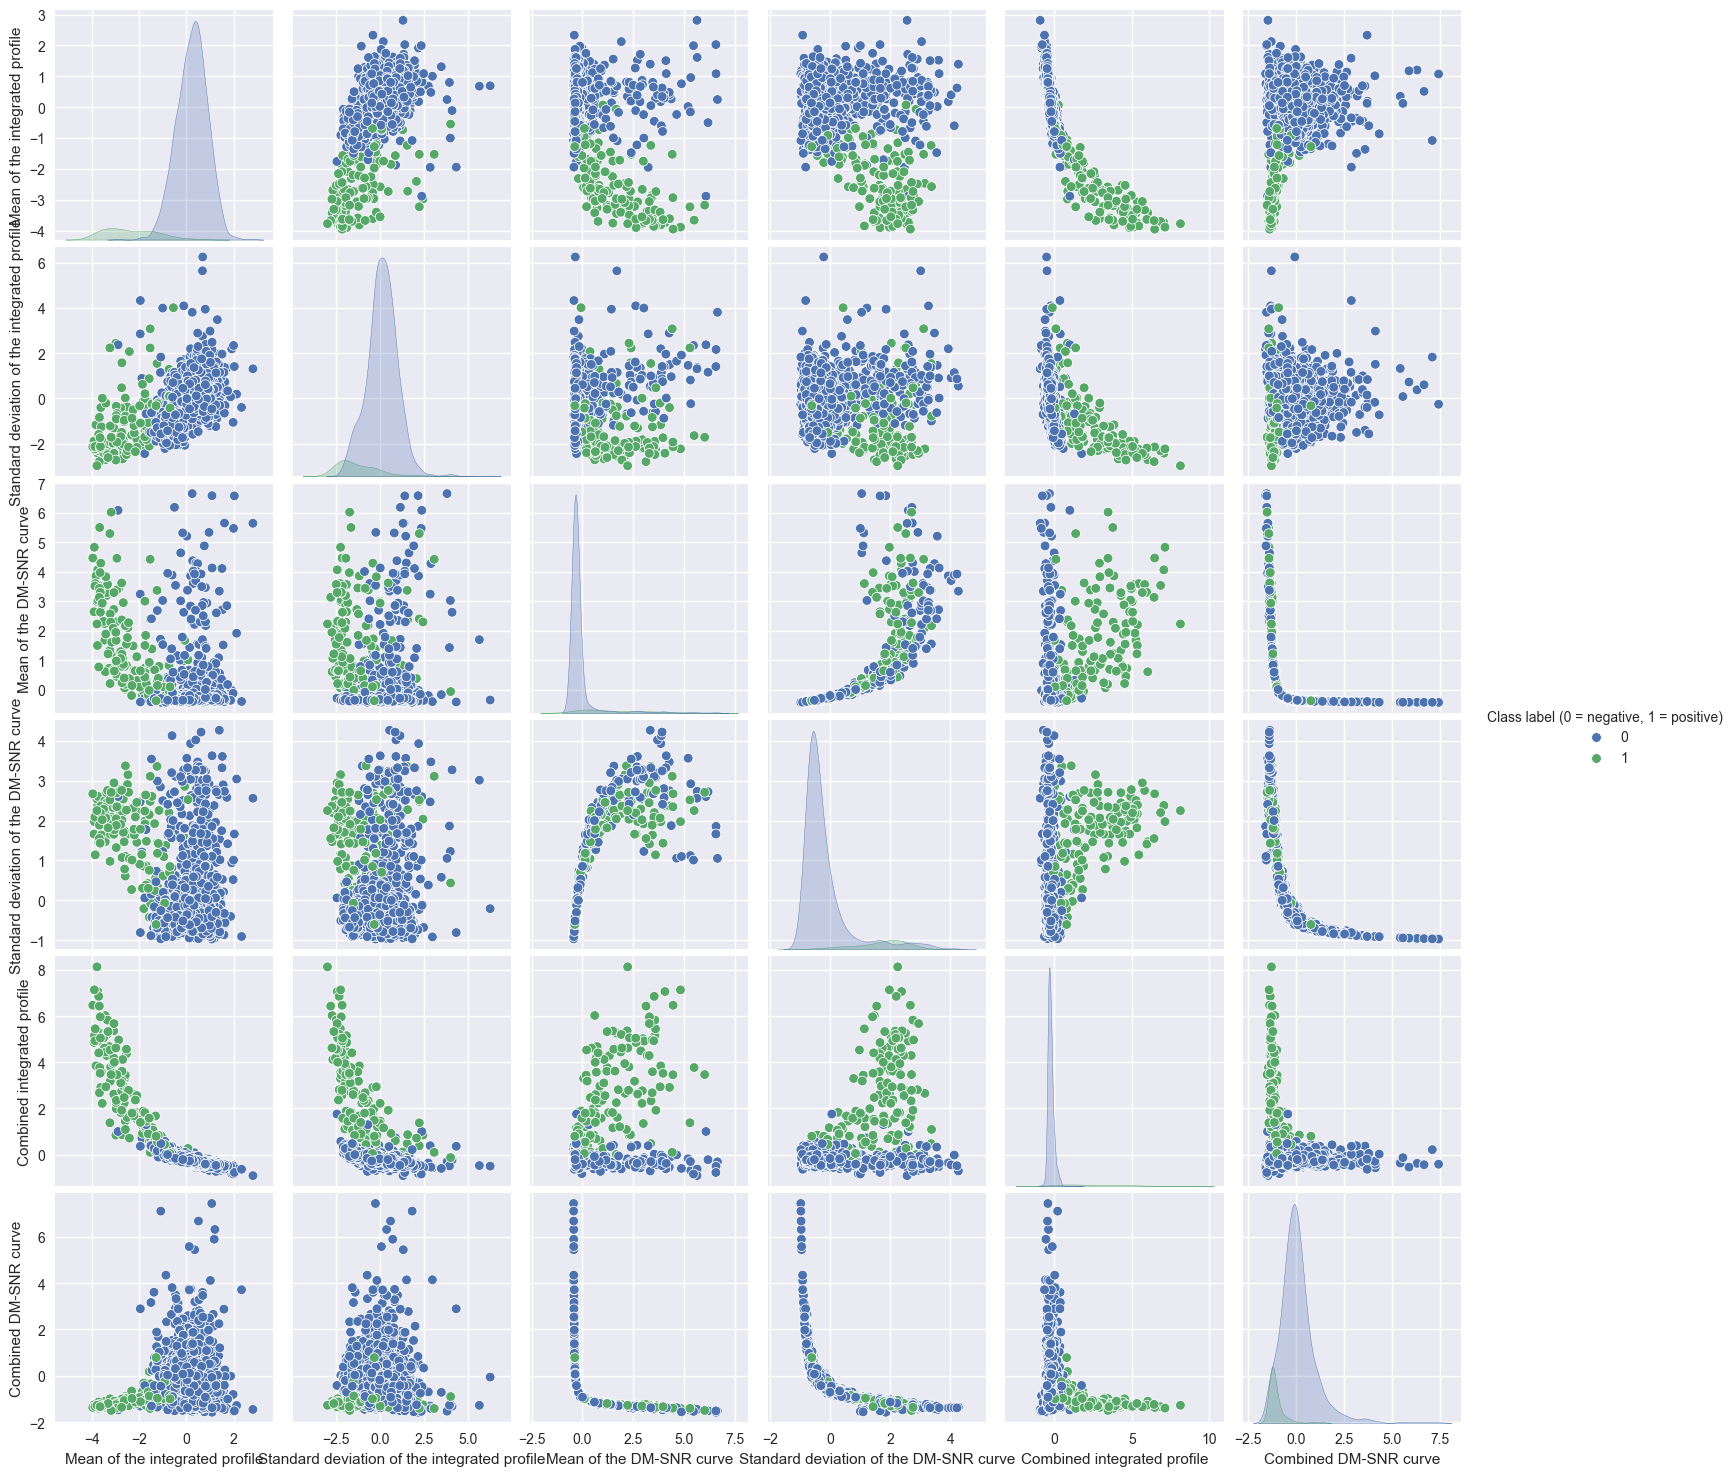

In [5]:
scalar = StandardScaler()
normalised_df = pd.DataFrame(scalar.fit_transform(df_dropped1))
df_scale = pd.DataFrame(scalar.transform(df_dropped1), columns=df_dropped1.columns)
df_scale[target_col] = raw_df[target_col]

df_scale["Combined integrated profile"] = (
    df_scale["Excess kurtosis of the integrated profile"] + 
    df_scale["Skewness of the integrated profile"]
)/2

df_scale["Combined DM-SNR curve"] = (
    df_scale["Excess kurtosis of the DM-SNR curve"] + 
    df_scale["Skewness of the DM-SNR curve"]
)/2
df_scale_combined = df_scale.drop(highly_correlated_cols,axis=1)

# Correlation
scale_combined_corr = df_scale_combined.corr()

sns.heatmap(scale_combined_corr[[target_col]].sort_values(by=target_col, ascending=False), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
# Relationships
sns.pairplot(df_scale_combined, hue= target_col)

In [6]:
print(df_scale_combined.columns)

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve',
       'Class label (0 = negative, 1 = positive)',
       'Combined integrated profile', 'Combined DM-SNR curve'],
      dtype='object')


The most distinct split between the labels appears in columns `Mean of the integrated profile` and `Combined integrated profile` columns, with almost a clear split. The correlation matrix also confirms this with `-0.72` and `0.79` correlations with the label column, meaning they would be the best distinciton columns. These variables are most likly to have the largest impact on the model.

Algorithms that might work to classify data:
 - Binary Logistical Regresson (BLR)
 - SVM
 - decision trees 
 - random forests
 - K neares neighbours, (Knn)

**BLR** is not appropriate as there is complex separation between other column. The linear decision would struggle with some non linear relationships between variables.

**SVM** could work as in the distinct separations `Mean of the integrated profile` and `Combined integrated profile` columns a hyperplane could be fitted. However there is often overlap between variables, meaning it would produce false identifications, especially for the other variables where the distinction isn't as apparent.

**Knn** would work on some features like `Mean of the DM-SNR curve`, `Standard deviation of the DM-SNR curve` where there is distinct regions and can handle nonlinearity effectivly. However the curse of dimensionallity would effect this as there are other relationships between variables that are less distinct. To do this method more preprossing would need to be done to reduce dimensionality, like a PCA or remove lowly correlated columns. 

**Random forests** would be the best options due to the ability of this algorithm to capture the simple and complex distinctions seen when comparing variables, still working with the number of variables in our data. This is the method I will be choosing to categorise the data

## Preparing

#### Splitting into test and train datasets

`X` is the feature matrix and `y` is target variable. `stratify=y` used to ensure a balanced spilt of data, reducing any chances of bias. Without it there may be too many of either `1` or `0` labels, lost likely having too little `1` labels as there is only 150 of them compared to the 1598 `0` labels. This ensures that the ratio of `1` to `0` stays the same for all split data.


In [7]:
X = df_scale_combined.drop(columns=target_col)
y = df_scale_combined[target_col]

# X = df_scale.drop(columns=target_col)
# y = df_scale[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Creating a Decision tree

In [8]:
max_depth = 3
Dec_Tree_model = DecisionTreeClassifier(criterion="gini", max_depth=max_depth, random_state=42)
Dec_Tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

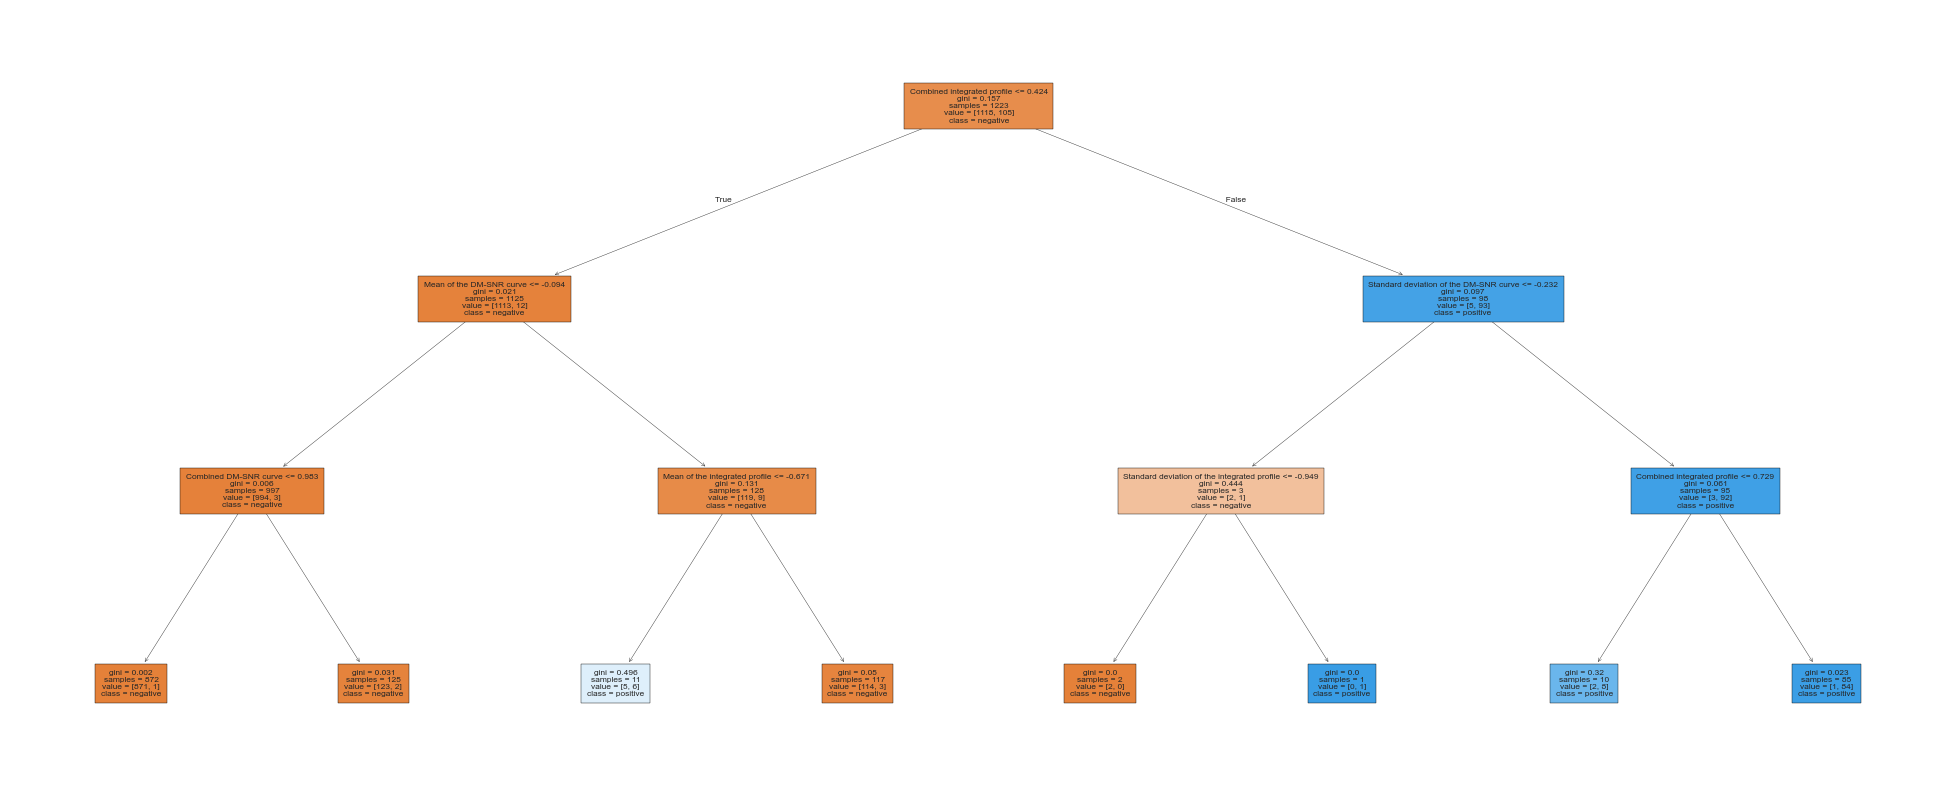

In [9]:
Dec_Tree_yPred = Dec_Tree_model.predict(X_test)
plt.figure(figsize=(25,10))
plot_tree(
    Dec_Tree_model, 
    feature_names=X.columns, 
    class_names=["negative", "positive"], 
    filled=True, 
    fontsize=6  # Adjust the font size for readability
)
plt.show()

In [10]:
max_depth = 2
Dec_Tree_model = DecisionTreeClassifier(criterion="gini", max_depth=max_depth, random_state=42)
Dec_Tree_model.fit(X_train, y_train)
Dec_Tree_yPred = Dec_Tree_model.predict(X_test)

Dec_Tree_accuracy = accuracy_score(y_test, Dec_Tree_yPred)
print("Decision Tree Model Performance:")
print("Accuracy:", Dec_Tree_accuracy)
print("Classification Report:\n", classification_report(y_test, Dec_Tree_yPred))

Decision Tree Model Performance:
Accuracy: 0.979047619047619
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       480
           1       0.93      0.82      0.87        45

    accuracy                           0.98       525
   macro avg       0.95      0.91      0.93       525
weighted avg       0.98      0.98      0.98       525



In [11]:
from sklearn.model_selection import cross_val_score

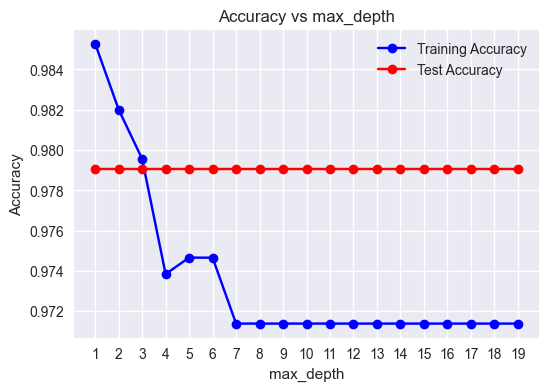

In [12]:
# Splitting on the combined dataset
X = df_scale_combined.drop(columns=target_col)
y = df_scale_combined[target_col]

# Testing without combining
# X = df_scale.drop(columns=target_col)
# y = df_scale[target_col]

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Range of max_depth values
max_depths = range(1, 20)
mean_train_scores = []
mean_test_scores = []

# calc cross-validation scores for each depth
for depth in max_depths:
    dt = DecisionTreeClassifier(criterion="gini", max_depth=depth, random_state=42)
    
    # Training scores
    train_scores = cross_val_score(dt, X_train, y_train, cv=5)
    mean_train_scores.append(np.mean(train_scores))
    
    # Test scores
    test_scores = cross_val_score(dt, X_test, y_test, cv=5)
    mean_test_scores.append(np.mean(test_scores))

# Plot
plt.figure(figsize=(6, 4))
plt.plot(max_depths, mean_train_scores, 'o-', color='blue', label='Training Accuracy')
plt.plot(max_depths, mean_test_scores, 'o-', color='red', label='Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(1, 20))
plt.legend()
plt.title('Accuracy vs max_depth')
plt.grid(True)
plt.show()

This shows an unusual trend where the accuracy decreases as the depth of the tree increases. By changing the `random_state` variable, the shape of both the test and train accuracy graphs change, but it always decreases and then platos at a lower accuracy. The same trend was seen when not using the combined data, however the accuracys seen are lower.

The best tree size would be a `max_depth` of around 1-3, to maintain accuracy without underfitting. By rerunning the classificaiton report cell `max_depth = 2` was found to produce the highest precision for predicting pulsars (`1`s)

Mean of the integrated profile: 0.0046
Standard deviation of the integrated profile: 0.0304
Mean of the DM-SNR curve: 0.0951
Standard deviation of the DM-SNR curve: 0.0000
Combined integrated profile: 0.8373
Combined DM-SNR curve: 0.0327


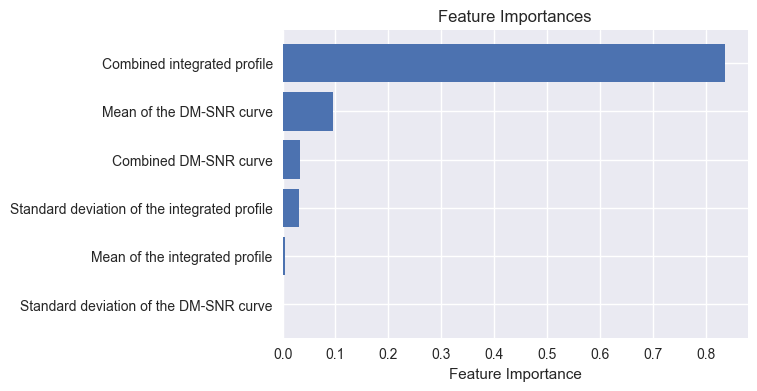

In [13]:
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
DT_model.fit(X_train, y_train)

for feature, importance in zip(X_train.columns, DT_model.feature_importances_):
    print(f"{feature}: {importance:.4f}")

DT_importances = DT_model.feature_importances_

# Sort features by importance
sorted_indices = np.argsort(DT_importances)[::-1]
sorted_features = [X_train.columns[i] for i in sorted_indices]
sorted_DT_importances = DT_importances[sorted_indices]

# Plot
plt.figure(figsize=(6, 4))
plt.barh(sorted_features, sorted_DT_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
plt.show()

This feature importance demonstrates that the integrated profile is the most important variable in the tree as expected. The others have a much smaller influence on the prediction, with `Mean of the integrated profile` having a suprisingly small influence than expected from the pairplot.

Lets use a Random Forest

## Random Forest Model

In [14]:
forest_depth = 3
Forest_model = RandomForestClassifier(n_estimators=100, max_depth=forest_depth, random_state=42)
Forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

Mean of the integrated profile: 0.3780
Standard deviation of the integrated profile: 0.0594
Mean of the DM-SNR curve: 0.0678
Standard deviation of the DM-SNR curve: 0.0528
Combined integrated profile: 0.4067
Combined DM-SNR curve: 0.0352


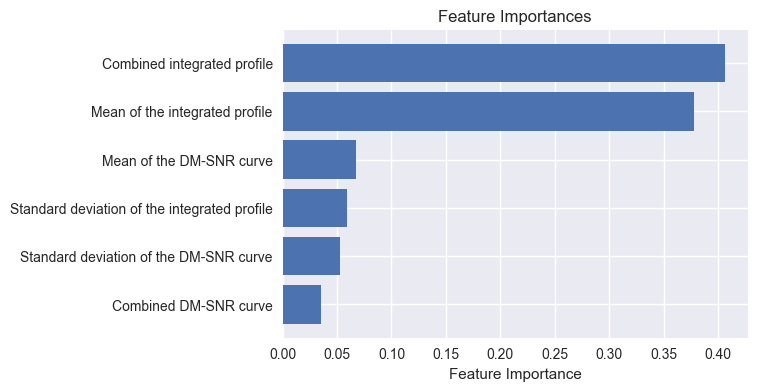

In [15]:
y_pred_Forest = Forest_model.predict(X_test)

for feature, importance in zip(X_train.columns, Forest_model.feature_importances_):
    print(f"{feature}: {importance:.4f}")


importances = Forest_model.feature_importances_

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]
sorted_features = [X_train.columns[i] for i in sorted_indices]
sorted_importances = importances[sorted_indices]

# Plot
plt.figure(figsize=(6, 4))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
plt.show()


This random forest model now shows the importance of each column expected form the pairplot analysis earlier, with `Mean of the integrated profile` having a much higher importance compared to that of 1 decision tree.

Random Forest Model Performance:
Depth: 3
Accuracy: 0.9809523809523809
Classification Report:


0          1  accuracy   macro avg  weighted avg
precision    0.985537   0.926829  0.980952    0.956183      0.980505
recall       0.993750   0.844444  0.980952    0.919097      0.980952
f1-score     0.989627   0.883721  0.980952    0.936674      0.980549
support    480.000000  45.000000  0.980952  525.000000    525.000000

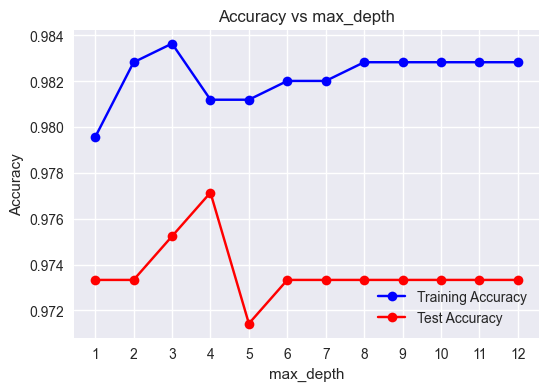

In [16]:
Forest_accuracy = accuracy_score(y_test, y_pred_Forest)

print("Random Forest Model Performance:")
print(f"Depth: {forest_depth}")
print("Accuracy:", Forest_accuracy)
print("Classification Report:")
display(pd.DataFrame(classification_report(y_test, y_pred_Forest,output_dict=True)))


depth_analysis = True
if depth_analysis:
    # Range of max_depth values
    max_depths = range(1, 13)
    mean_train_scores = []
    mean_test_scores = []

    # calc cross-validation scores for each depth
    for depth in max_depths:
        Forest_model_depthAnalysis = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=12,criterion="entropy")
        Forest_model_depthAnalysis.fit(X_train,y_train)
        
        # Training scores
        train_scores = cross_val_score(Forest_model_depthAnalysis, X_train, y_train, cv=5)
        mean_train_scores.append(np.mean(train_scores))
        
        # Test scores
        test_scores = cross_val_score(Forest_model_depthAnalysis, X_test, y_test, cv=5)
        mean_test_scores.append(np.mean(test_scores))

    # Plot
    plt.figure(figsize=(6, 4))
    plt.plot(max_depths, mean_train_scores, 'o-', color='blue', label='Training Accuracy')
    plt.plot(max_depths, mean_test_scores, 'o-', color='red', label='Test Accuracy')
    plt.xlabel('max_depth')
    plt.ylabel('Accuracy')
    plt.xticks(ticks=range(1, 13))
    plt.legend()
    plt.title('Accuracy vs max_depth')
    # plt.savefig("figures\\rand_forest_depth")
    plt.show()

Takes a while to run above so here is the figure from the depth analysis.

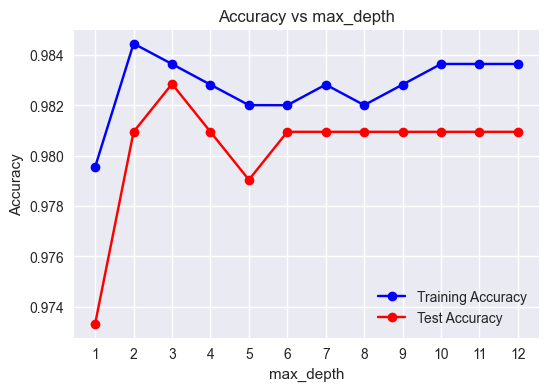


This shows an increase in accuracy as the depth increases (yay!), peaking at 2 for this random state (42), but 3 or 4 for others. It also has higher accuracies overall than the decision tree, proving to be the better classification method. A depth of 3 was chosen to enuse high accuracy and is sufficiently low enough to reduce overfitting. 

### Different criterions

In [17]:
criterions = ["gini", "log_loss", "entropy"]
for ran_state in [12,20,42]:
    print(f"Random state: {ran_state}")
    for cri in criterions:
        Forest_model_criterions = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=ran_state,criterion=cri)
        Forest_model_criterions.fit(X_train,y_train)
        y_pred_Forest_criterion = Forest_model_criterions.predict(X_test)
        print(f"   Criterion '{cri}', accuracy: {accuracy_score(y_test, y_pred_Forest_criterion):.3f}")

Random state: 12
   Criterion 'gini', accuracy: 0.979
   Criterion 'log_loss', accuracy: 0.979
   Criterion 'entropy', accuracy: 0.979
Random state: 20
   Criterion 'gini', accuracy: 0.983
   Criterion 'log_loss', accuracy: 0.983
   Criterion 'entropy', accuracy: 0.983
Random state: 42
   Criterion 'gini', accuracy: 0.981
   Criterion 'log_loss', accuracy: 0.983
   Criterion 'entropy', accuracy: 0.983


All criterions perform equally as well, with small differences arising when the random state is changed. Showing any are appropriate for this task. 'gini' will be used as it is the default.

##### Confusion Matrix

Class label (0 = negative, 1 = positive)
0    480
1     45
Name: count, dtype: int64


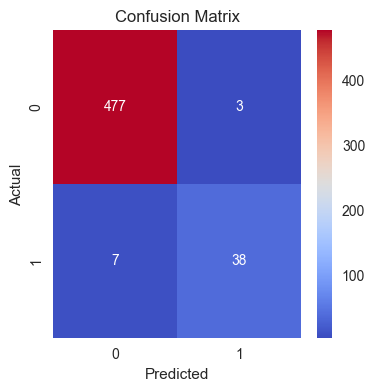

In [18]:
fig, ax = plt.subplots(1,1, figsize = (4,4))

conf_mat = confusion_matrix(y_test, y_pred_Forest)

sns.heatmap(conf_mat, cmap = "coolwarm", annot=True, fmt = ".3g", ax=ax)

ax.set_title("Confusion Matrix")
ax.set_ylabel("Actual")
ax.set_xlabel("Predicted")
print(y_test.value_counts())
plt.show()

Confusion matrix shows that the model keeps the imbalance of labels, and for the majority of classifications gets the prediction correct when tested on the `y_test` data from the data splitting.

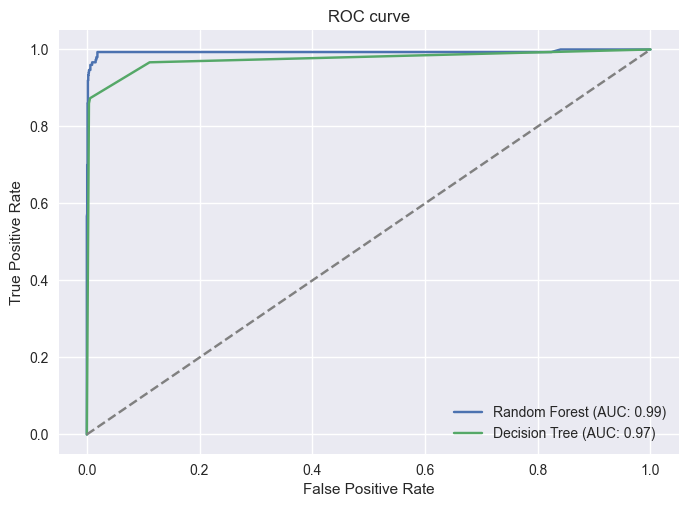

In [19]:
Forest_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
Forest_model.fit(X_train, y_train)

# Splitting on the combined dataset
X = df_scale_combined.drop(columns=target_col)
y = df_scale_combined[target_col]

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y, Forest_model.predict_proba(X)[:, 1])
fpr_dec_tree, tpr_dec_tree, _ = roc_curve(y, Dec_Tree_model.predict_proba(X)[:,1])
fig,ax = plt.subplots()
ax.plot(fpr,tpr, label=f"Random Forest (AUC: {auc(fpr, tpr):.2f})")
ax.plot(fpr_dec_tree, tpr_dec_tree, label=f"Decision Tree (AUC: {auc(fpr_dec_tree, tpr_dec_tree):.2f})")
ax.plot([0, 1], [0, 1], linestyle='--', color='grey')
ax.set_xlabel("False Positive Rate")
ax.legend()
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC curve")
plt.show()

The high Area under curve, `AUC=0.99`, shows that the RandomForest model is very good at distinguishing between classes, better than that of the Decision Tree model. The curve reaching the top right corner shows that the model creates a lot of true predicitons about the pulsars while producing minimal false results. It also shows that there is good generalisation as the threshold can be changed and still a good performance (High TPR rates at a low FPR rates). 

## SVM - Support Vector Machine

Investigating how other models mentioned earlier perform on the dataset to compare the the Random Forest model

In [20]:
from sklearn.svm import SVC

In [21]:
SVM_lin = SVC(kernel="linear", random_state=42,probability=True)
SVM_lin

SVC(kernel='linear', probability=True, random_state=42)

In [22]:
# Fit SVM model
SVM_lin.fit(X_train,y_train)

# Predict values
y_pred_SVM_lin = SVM_lin.predict(X_test)

SVM_lin_accuracy = accuracy_score(y_test,y_pred_SVM_lin)
print("accuracy_score", SVM_lin_accuracy)

accuracy_score 0.9809523809523809


Seeing if other kernels are better

In [23]:
SVM_rbf = SVC(kernel= "rbf", random_state=42, probability=True)


# Fit SVM model
SVM_rbf.fit(X_train,y_train)

# Predict values
y_pred_SVM_rbf = SVM_rbf.predict(X_test)

SVM_rbf_accuracy = accuracy_score(y_test,y_pred_SVM_rbf)
print("accuracy_score", SVM_rbf_accuracy)

accuracy_score 0.9828571428571429


Linear Kernel SVM classificaion report: 


0          1  accuracy   macro avg  weighted avg
precision    0.985537   0.926829  0.980952    0.956183      0.980505
recall       0.993750   0.844444  0.980952    0.919097      0.980952
f1-score     0.989627   0.883721  0.980952    0.936674      0.980549
support    480.000000  45.000000  0.980952  525.000000    525.000000

RBF Kernel SVM classificaion report: 


0          1  accuracy   macro avg  weighted avg
precision    0.987578   0.928571  0.982857    0.958075      0.982520
recall       0.993750   0.866667  0.982857    0.930208      0.982857
f1-score     0.990654   0.896552  0.982857    0.943603      0.982588
support    480.000000  45.000000  0.982857  525.000000    525.000000

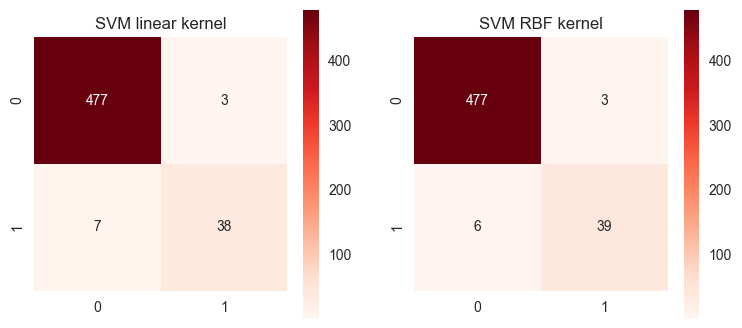

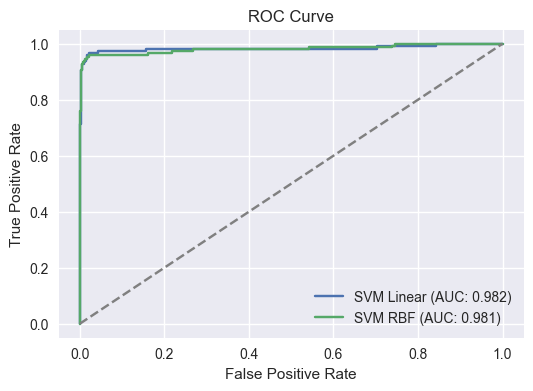

In [24]:
SVM_lin_class = pd.DataFrame(classification_report(y_test, y_pred_SVM_lin, output_dict=True))
SVM_rbf_class = pd.DataFrame(classification_report(y_test, y_pred_SVM_rbf, output_dict=True))
# Forest_class = pd.DataFrame(classification_report(y_test, y_pred_Forest, output_dict=True))

print("Linear Kernel SVM classificaion report: ")
display(SVM_lin_class)
print("RBF Kernel SVM classificaion report: ")
display(SVM_rbf_class)
# print(f"depth {forest_depth}, Random Forest classificaion report: ")
# display(Forest_class)

fig,ax = plt.subplots(1,2, figsize = (9,4))
sns.heatmap(confusion_matrix(y_test, y_pred_SVM_lin), ax=ax[0], annot = True, fmt = ".3g", cmap = "Reds")
ax[0].set_title("SVM linear kernel")
ax[0].set_aspect("equal")

sns.heatmap(confusion_matrix(y_test, y_pred_SVM_rbf), ax=ax[1], annot = True, fmt = ".3g", cmap = "Reds")
ax[1].set_title("SVM RBF kernel")
ax[1].set_aspect("equal")

# sns.heatmap(confusion_matrix(y_test, y_pred_Forest), ax=ax[2], annot = True, fmt = ".3g", cmap = "Reds")
# ax[2].set_title("Random Forest")
# ax[2].set_aspect("equal")

plt.show()
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for model, label in zip([SVM_lin, SVM_rbf], ["SVM Linear", "SVM RBF"]):
    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
    ax.plot(fpr, tpr, label=f"{label} (AUC: {auc(fpr, tpr):.3f})")
ax.plot([0, 1], [0, 1], linestyle='--', color='grey')
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve")
ax.legend()
plt.show()

The RBF kernel shows a slightly better performance with an accuracy of $98.3\%$ compared to the linear model $98.1\%$. The areas under the curve (AUC) are also very close, with the linear kernel $AUC = 0.982$ and the RBF kernel $AUC = 0.981$. The marginal improvement on the accuracy and precision at scoring 0's arises from the nonlinear shape of the data seen in the pairplots earlier, with the RBF kernel better capturing the decision boundaries.

## BLR - Binary Logistic Regression

Investigating the BLR as it is a simpler model and is more computationally efficient, with 

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
BLR_model = LogisticRegression(solver="saga", max_iter=500)
BLR_model.fit(X_train, y_train)
y_pred_BLR = BLR_model.predict(X_test)
BLR_model

LogisticRegression(max_iter=500, solver='saga')

Accuracy: 0.9809523809523809
BLR classificaion report: 


0          1  accuracy   macro avg  weighted avg
precision    0.985537   0.926829  0.980952    0.956183      0.980505
recall       0.993750   0.844444  0.980952    0.919097      0.980952
f1-score     0.989627   0.883721  0.980952    0.936674      0.980549
support    480.000000  45.000000  0.980952  525.000000    525.000000

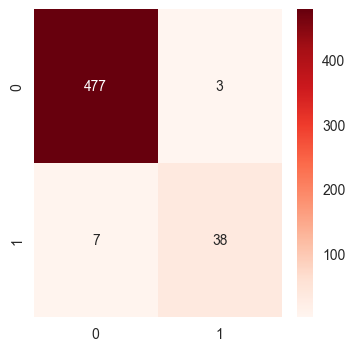

Feature Importance for Binary Logistic Regression:


Feature  Importance  odd ratio
4                   Combined integrated profile    2.764834  15.876396
0                Mean of the integrated profile   -1.738623   0.175762
5                         Combined DM-SNR curve   -0.860247   0.423058
2                      Mean of the DM-SNR curve   -0.775817   0.460328
3        Standard deviation of the DM-SNR curve    0.692672   1.999050
1  Standard deviation of the integrated profile    0.525621   1.691510

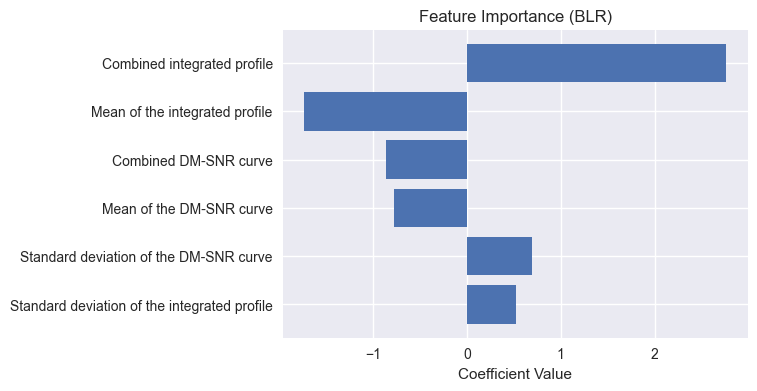

In [27]:
from mpl_toolkits.mplot3d import Axes3D

BLR_accuracy = accuracy_score(y_test, y_pred_BLR)
print(f"Accuracy: {BLR_accuracy}")

BLR_class = pd.DataFrame(classification_report(y_test, y_pred_BLR, output_dict=True))
print(f"BLR classificaion report: ")
display(BLR_class)

fig0,ax0 = plt.subplots(1,1,figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_pred_BLR), cmap = "Reds", annot=True, fmt = ".3g", ax=ax0)
plt.show()

# Extract feature importance (coefficients) from the BLR model
BLR_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': BLR_model.coef_[0]
}).sort_values(by='Importance', key=abs, ascending=False)
BLR_importances["odd ratio"] = np.exp(BLR_importances["Importance"])
# Display the feature importance
print("Feature Importance for Binary Logistic Regression:")
display(BLR_importances)

# Plot the feature importance
plt.figure(figsize=(6, 4))
plt.barh(BLR_importances['Feature'], BLR_importances['Importance'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (BLR)')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
plt.show()

Although the initial expectation of the BLR to perform badly due to non-linearity in the data it actually performs well, with an accuracy of $98.1\%$ is the same as the Random Forest Model, with an identi classification report and confusion matrix. 

**Importance (model coefficients)**:
 - `Combined intergrated profile` (2.77): Strongest predictor, with increaing values increasing the liklihood of being a pulsar. Looking at the odd ratio, this variable increases the odds of predicting a pulsar by almost a factor of $16$, ($15.88$).
 - `Mean of the integrated profile` (-1.74): next strongest, but inverse relationship. So increased values here decreases the chance of a data point being classified as a pulsar. The odd ratio multiplies the odds of predicting a pulsar by $0.18$, an $82\%$ decrease.
 -  Other columns have a slight pull to either increase or decrease the chance of a puslar being classified, but not early as much as these two columns. This aligns with what is seen in the Random Forest model and the expectation from the pairplot analysis.

## Comparing Models

Lets compare all of the models, as all have been seen to predict well for this dataset, but is one more suited? 

SVM rbf accuracy: 0.9829
BLR model accuracy: 0.9810
Forest model accuracy: 0.9810


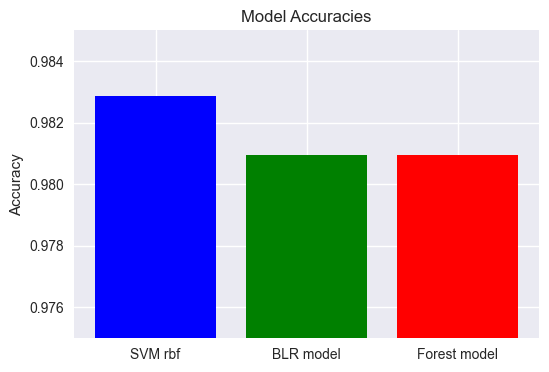

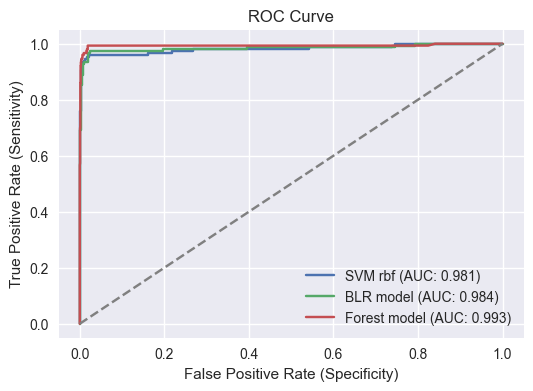

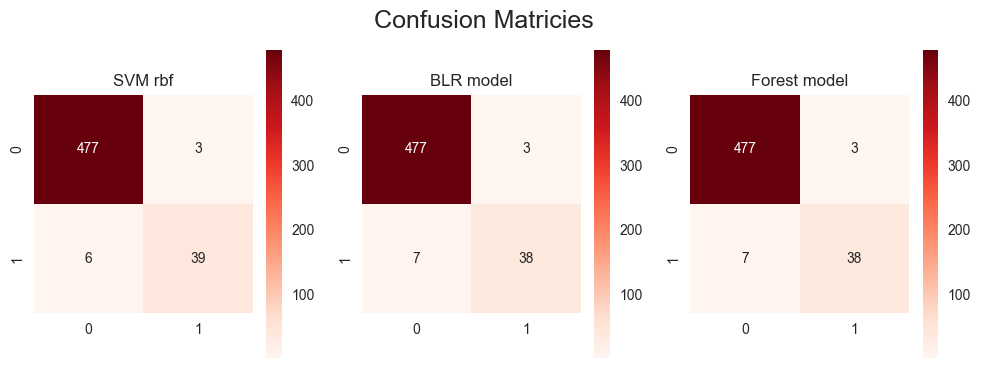

In [30]:
models = [SVM_rbf, BLR_model, Forest_model]
labels = ["SVM rbf", "BLR model", "Forest model"]
accuracies = [SVM_rbf_accuracy, BLR_accuracy,Forest_accuracy]
predictions = [y_pred_SVM_rbf, y_pred_BLR, y_pred_Forest]

# for model, label in zip(models, labels):
fig0,ax0 = plt.subplots(1,1, figsize = (6,4))
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
fig1,ax1 = plt.subplots(1,3, figsize = (12,4))

for model, label,axi,y_pred, acc in zip(models, labels, ax1, predictions, accuracies):
    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
    ax.plot(fpr, tpr, label=f"{label} (AUC: {auc(fpr, tpr):.3f})")

    print(label, f"accuracy: {acc:.4f}")
    ax0.bar(labels, accuracies, color=["blue", "green", "red"])

    sns.heatmap(confusion_matrix(y_test, y_pred), ax=axi, annot = True, fmt = ".3g", cmap = "Reds")
    axi.set_title(label)
    axi.set_aspect("equal")
fig1.suptitle("Confusion Matricies", fontsize = 18)
ax.plot([0, 1], [0, 1], linestyle='--', color='grey')
ax.set_xlabel("False Positive Rate (Specificity)")
ax.set_ylabel("True Positive Rate (Sensitivity)")
ax.set_title("ROC Curve")
ax.legend()

ax0.set_title("Model Accuracies")
ax0.set_ylabel("Accuracy")
ax0.set_ylim(0.975, 0.985)  # Set y-axis limits for better visualization
plt.show()

#### Comments

The SVM with an RBF ernel achieved the highest accuracy at $0.9829$, only slightly outperforming both the Random Forest and the Binary Logistic Regression models, whom both achieved $0.9810$ accuracy. This high accuracy across the board indicates that the dataset is very well suited to be used to predict labels for a larger dataset. 

Comparing the ROC and AUC curves for each model:
 - Random Forest has the highest with AUC = $0.993$
 - BLR also performed well with AUC = $0.984$
 - SVM was the lowest score but still with a high score of AUC = $0.981$

Despite the SVM having the highest accuracy, The Random Forest has a higher AUC (area under the curve), suggesting it is the better model at classifiying at different thresholds, with the highest 

## Visualising Model on initial data

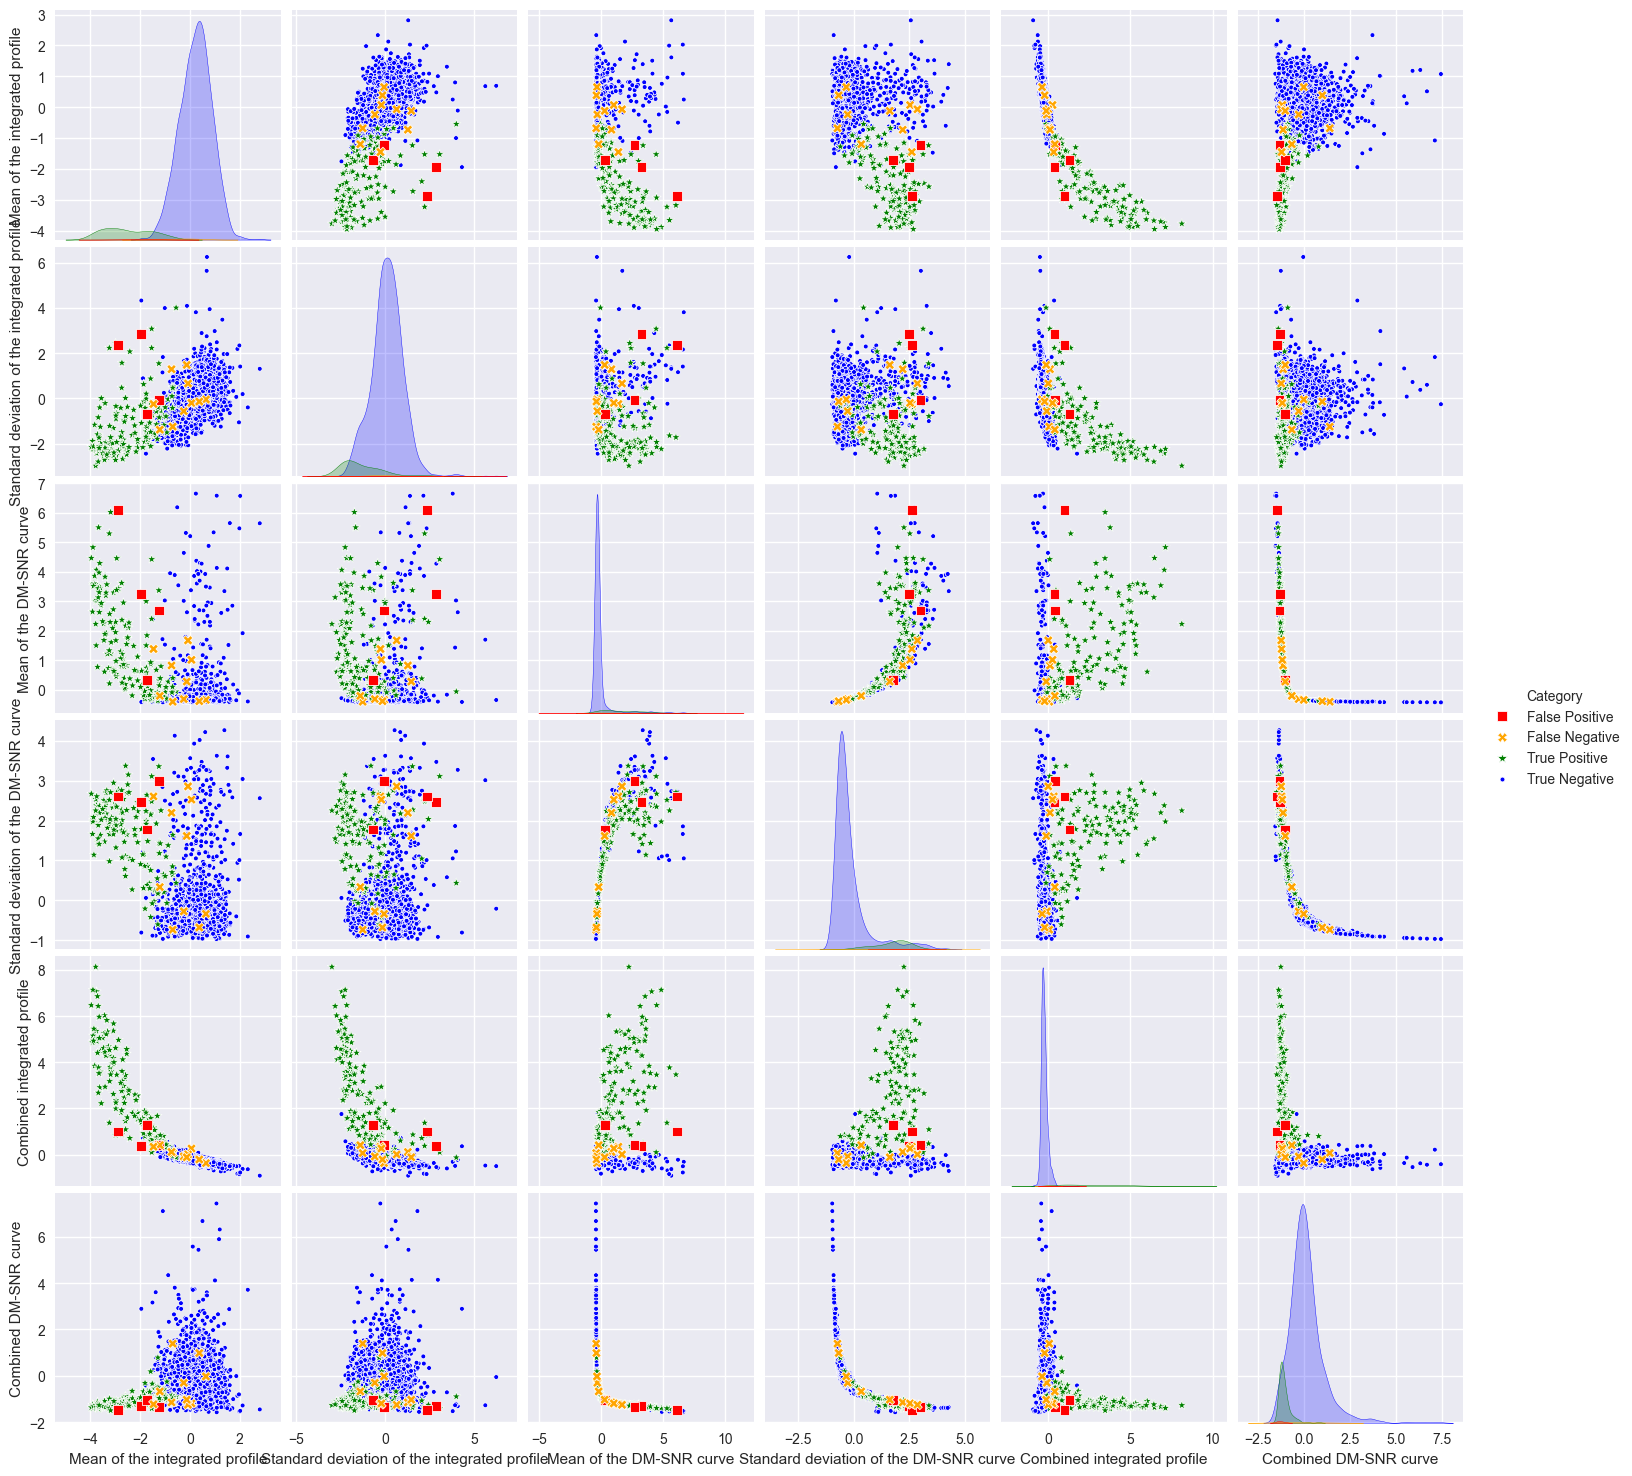

In [29]:
# Create a DataFrame to store the predictions from the Random Forest Model
results_df1 = df_scale_combined.copy()
results_df = df_scale_combined.copy() # DataFrame to be in the PairPlot
results_df['Prediction'] = Forest_model.predict(results_df1.drop(columns=target_col))

# Define the categories
results_df['Category'] = 'True Negative'  # Default category
results_df.loc[(results_df[target_col] == 1) & (results_df['Prediction'] == 1), 'Category'] = 'True Positive'
results_df.loc[(results_df[target_col] == 0) & (results_df['Prediction'] == 1), 'Category'] = 'False Positive'
results_df.loc[(results_df[target_col] == 1) & (results_df['Prediction'] == 0), 'Category'] = 'False Negative'

# Sort in ascending order so False predictions are obvious in the plot by assigning numeric values
results_df['Category Value'] = results_df['Category'].map({
    'True Negative': 0,
    'True Positive': 1,
    'False Positive': 2,
    'False Negative': 3
})
results_df = results_df.sort_values(by='Category Value', ascending=True)

# Set plot styling
hue_order = [ 'False Positive', 'False Negative', 'True Positive', 'True Negative']
palette = ["r", "orange", "g", "b"]
markers = ['.', '*', 's', 'X']


sns.pairplot(
    results_df.drop(columns=[target_col, "Prediction", "Category Value"]),
    hue="Category",
    diag_kind="kde",
    palette=palette,
    hue_order=hue_order,
    markers=markers
)
plt.show()

*Describe the plot and where the incorrect observations are coming from. Reference the feature importance graphs from earlier*